# BS Score over time

The primary goal of this notebook is to visualize the BS score over time under various groupings and conditions

Additionally, some of the processed datasets will be saved to disk for later use.

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Load the BS score with normalized timeline

In [23]:
normed_bs_df = pd.read_excel('../data/bs_normed_full.xls', index_col=0)
normed_bs_df.head()

,BS,norm_years
patient_id,,
40,2.96,0
40,3.00,1
40,3.20,2
40,3.10,3
40,3.40,4


### Load the BS score data aggregated for each year in normalized timeline

In [19]:
avg_by_norm_year = pd.read_excel('../data/bs_normed_agg.xls', index_col=0)
avg_by_norm_year.head()

,BS,count
norm_years,,
0,3.40,910
1,3.32,766
2,3.39,738
3,3.42,716
4,3.47,696


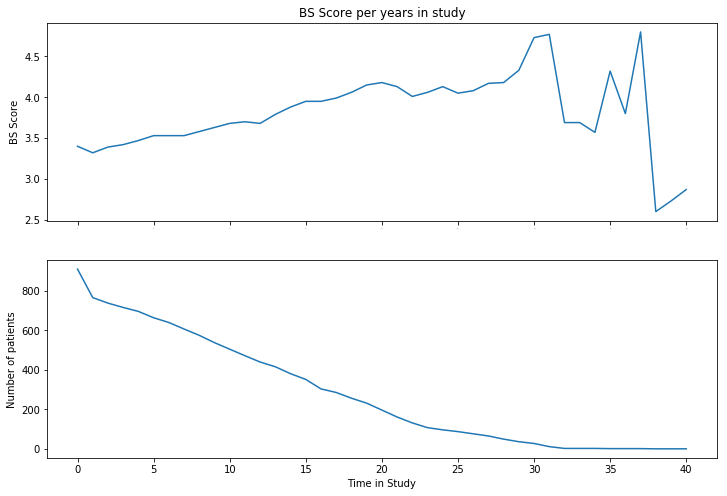

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
plt.plot(avg_by_norm_year['BS'])
plt.setp(ax1.get_xticklabels(), fontsize=0)
plt.title('BS Score per years in study')
ax1.set_ylabel('BS Score')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(avg_by_norm_year['count'])
ax2.set_xlabel('Time in Study')
ax2.set_ylabel('Number of patients')

plt.show()

## Repeat the above analysis for both males and females

The first step is to identify which patients are male and female.

In [30]:
demo_df = pd.read_excel('../data/demographics and Biologics data.xlsx')

# Get patient ids of males and females
genders = demo_df['patient_gender_id'].values

# Get male and female index
male_ids = demo_df[genders == 'Male']['patient_id']
female_ids = demo_df[genders == 'Female']['patient_id']

# # Get BS dataset of males and females
male_bs_df = agg_bs_df.loc[male_ids]
female_bs_df = agg_bs_df.loc[female_ids]

## Plot BS score over time for males

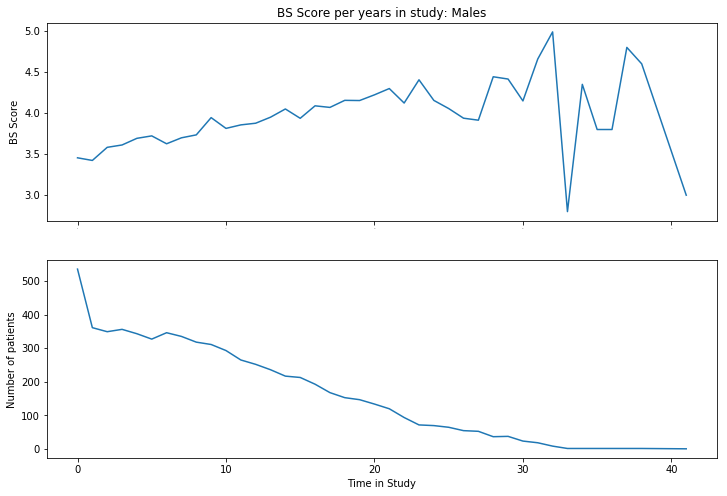

In [31]:
agg_male_df = (male_bs_df.groupby('norm_years')
                    .agg({'BS': 'mean', 'norm_years': len})
                    .rename(columns={'norm_years': 'count'}))


fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
plt.plot(agg_male_df['BS'])
plt.setp(ax1.get_xticklabels(), fontsize=0)
plt.title('BS Score per years in study: Males')
ax1.set_ylabel('BS Score')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(agg_male_df['count'])
ax2.set_xlabel('Time in Study')
ax2.set_ylabel('Number of patients')

plt.show()

## Plot BS over time for females

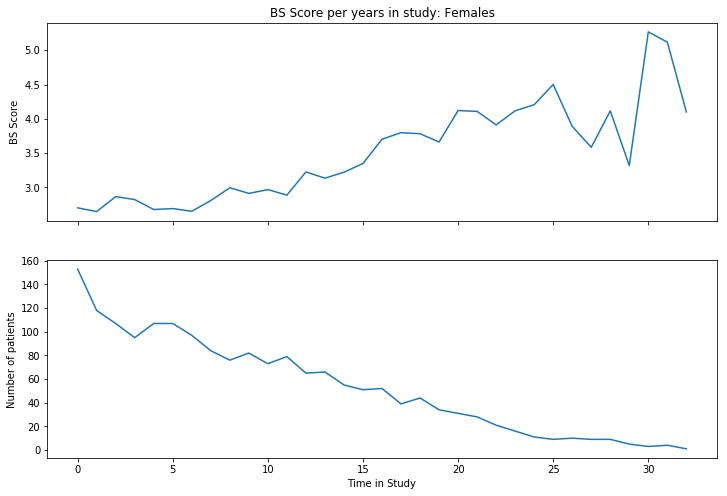

In [33]:
agg_female_df = (female_bs_df.groupby('norm_years')
                    .agg({'BS': 'mean', 'norm_years': len})
                    .rename(columns={'norm_years': 'count'}))


fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
plt.plot(agg_female_df['BS'])
plt.setp(ax1.get_xticklabels(), fontsize=0)
plt.title('BS Score per years in study: Females')
ax1.set_ylabel('BS Score')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(agg_female_df['count'])
ax2.set_xlabel('Time in Study')
ax2.set_ylabel('Number of patients')

plt.show()